In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E Commerce Dataset.csv' , index_col = 0)

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3.0,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(16890, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress      

All Data Types are accurate

In [6]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.strip())

In [7]:
df.isnull().sum() / df.shape[0] * 100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.635879
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                7.904085
PreferredPaymentMode           3.552398
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       3.552398
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  3.552398
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

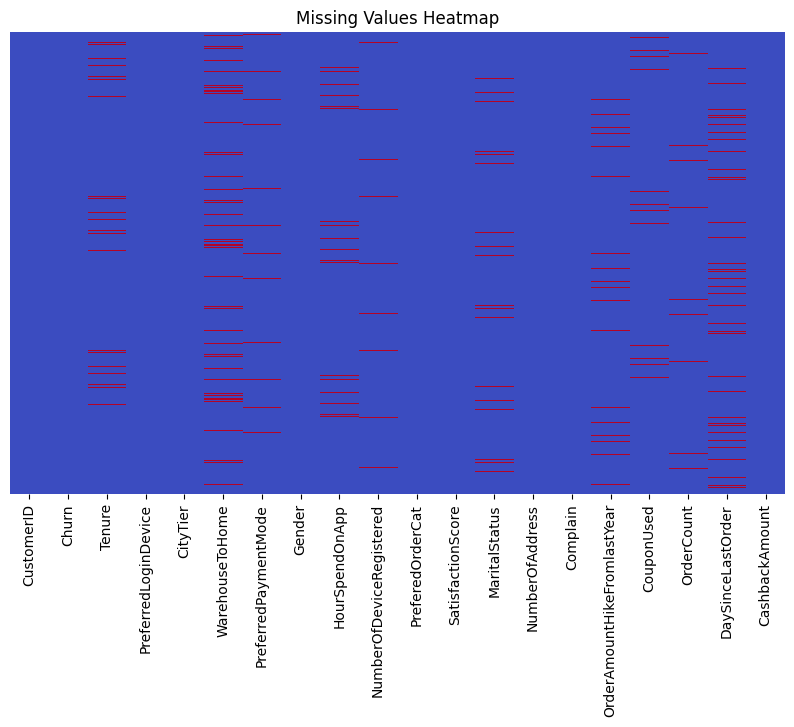

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

There is no specific pattern for missing data so It is considered as General Pattern

In [9]:
df.duplicated().sum()

11260

In [10]:
df['CustomerID'].duplicated().sum()

11260

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5369.000000,5630.000000,5185.000000,5375.000000,5430.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,-176.226485,1.654707,15.671553,2.931535,3.686740,10470.403552,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,1353.515499,0.915389,8.557175,0.721926,1.024128,77846.168278,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,-10000.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,589314.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [13]:
cols = df.columns
cols

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [14]:
for col in cols:
    print(df[col].value_counts())
    print("\n")
    print("*"*30)
    print("\n")

CustomerID
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: count, Length: 5630, dtype: int64


******************************


Churn
0    4682
1     948
Name: count, dtype: int64


******************************


Tenure
 1.0        676
 0.0        493
 8.0        257
 9.0        240
 7.0        216
 10.0       211
 5.0        201
 4.0        200
 3.0        192
 11.0       189
 6.0        182
 13.0       177
 14.0       174
 12.0       174
 2.0        166
 15.0       158
 16.0       148
 19.0       137
 18.0       120
 20.0       107
 17.0       105
-10000.0    100
 23.0        89
 21.0        83
 22.0        76
 24.0        75
 28.0        70
 30.0        66
 27.0        64
 26.0        60
 25.0        57
 29.0        54
 31.0        48
 50.0         1
 60.0         1
 51.0         1
 61.0         1
Name: count, dtype: int64


******************************


PreferredLoginDevice
Mobile Phone    2735
Comp

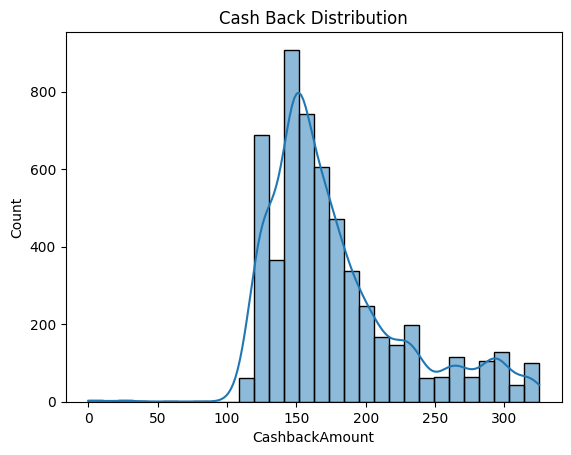

In [15]:
df['CashbackAmount'].describe()
sns.histplot(df['CashbackAmount'], bins=30, kde=True)
plt.title('Cash Back Distribution')
plt.show()

In [16]:
df['Gender'].unique()

array(['Female', 'Male', 'f', 'm'], dtype=object)

In [17]:
df['Gender'] = df['Gender'].replace({'m': 'Male', 'f': 'Female', 'M': 'Male', 'F': 'Female'})

In [18]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df[df['Tenure'].isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3.0,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3.0,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5.0,Mobile,3,NaN,2,0,12.0,1.0,1.0,1.0,122.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,52757,0,NaN,Phone,2,8.0,UPI,Female,2.0,3.0,Mobile,4,Married,5,0,14.0,0.0,1.0,2.0,121.87
2760,52761,0,NaN,Computer,1,7.0,CC,Male,2.0,4.0,Mobile,3,Married,2,0,12.0,0.0,1.0,0.0,120.08
2773,52774,0,NaN,Phone,3,7.0,NaN,Male,3.0,4.0,Mobile,4,Married,1,0,14.0,2.0,2.0,2.0,122.69
2783,52784,1,NaN,Computer,3,15.0,E wallet,Male,2.0,3.0,Mobile Phone,5,Married,2,0,19.0,1.0,1.0,0.0,117.90


In [20]:
df[df['Tenure'] < 0]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
8,50009,1,-10000.0,Phone,3,9.0,E wallet,Male,NaN,4.0,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
75,50076,0,-10000.0,Computer,1,6.0,COD,Male,2.0,4.0,Laptop & Accessory,5,Divorced,6,0,19.0,0.0,2.0,0.0,142.98
163,50164,1,-10000.0,Phone,1,NaN,CC,Male,2.0,3.0,Mobile,4,Married,3,1,13.0,1.0,1.0,2.0,123.73
175,50176,0,-10000.0,Mobile Phone,3,8.0,Debit Card,Male,2.0,3.0,Grocery,4,Single,2,0,19.0,1.0,NaN,4.0,260.15
177,50178,0,-10000.0,Mobile Phone,1,22.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,5,Single,1,0,19.0,0.0,1.0,7.0,156.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,55441,0,-10000.0,Mobile Phone,2,15.0,UPI,Male,3.0,4.0,Laptop & Accessory,4,Married,4,0,14.0,4.0,5.0,8.0,165.71
5527,55528,0,-10000.0,Phone,1,9.0,COD,Male,3.0,4.0,Mobile Phone,4,Married,3,0,12.0,1.0,2.0,3.0,147.26
5528,55529,0,-10000.0,Computer,1,29.0,UPI,Male,3.0,5.0,Laptop & Accessory,1,NaN,3,1,16.0,4.0,7.0,12.0,182.47
5544,55545,0,-10000.0,Mobile Phone,3,8.0,E wallet,Male,3.0,4.0,Fashion,1,Single,3,0,22.0,3.0,3.0,NaN,223.88


Most probabily this indicates missing values and it is prepresented in some large negative values so We will replace them with nan values

In [21]:
import numpy as np
df['Tenure'] = df['Tenure'].replace(-10000, np.nan)

In [22]:
df['Tenure'].isnull().sum() / df.shape[0]

0.06412078152753109

In [23]:
df['Tenure'].mode()

0    1.0
Name: Tenure, dtype: float64

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\1308342388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Tenure'], data=df, palette="coolwarm")


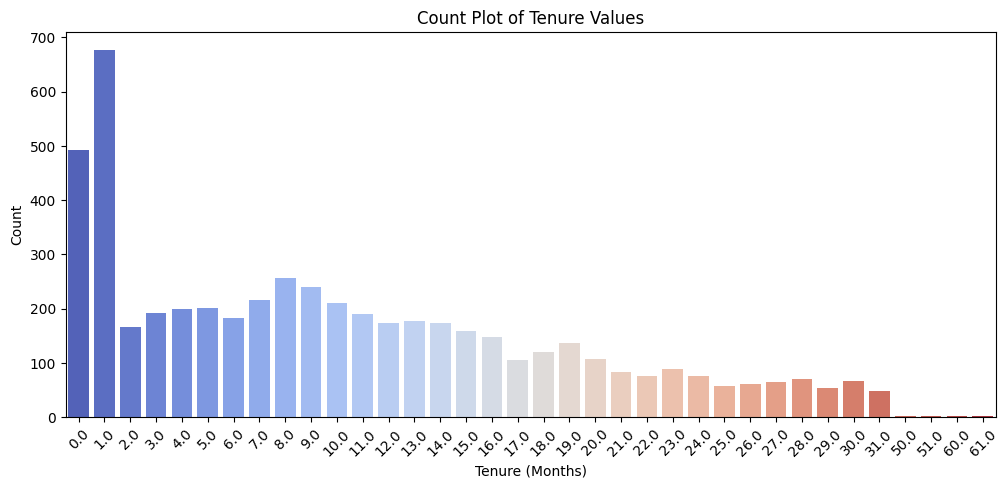

In [24]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['Tenure'], data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Count Plot of Tenure Values")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show();

In [25]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2735
Computer        1620
Phone           1225
0                 50
Name: count, dtype: int64

In [26]:
df['CityTier'].value_counts()

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64

In [27]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3.0,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [28]:
df['WarehouseToHome'].describe()

count    5185.000000
mean       15.671553
std         8.557175
min         5.000000
25%         9.000000
50%        14.000000
75%        21.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

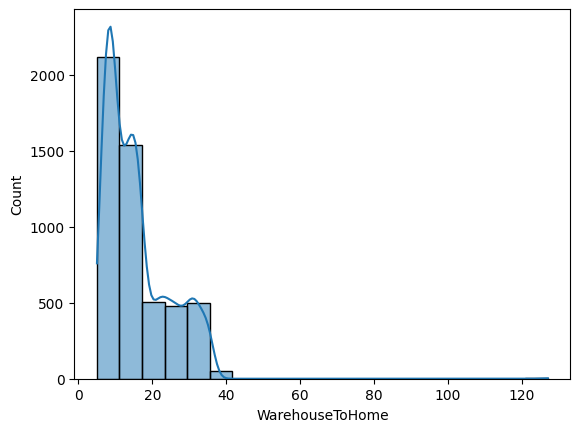

In [29]:
import seaborn as sns

# Plot histogram
sns.histplot(df['WarehouseToHome'].dropna(), bins=20, kde=True)

# Show plot
plt.show()

In [30]:
df[df['WarehouseToHome'] > 40]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3.0,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4.0,Mobile Phone,589314,Married,4,0,16.0,2.0,2.0,1.0,159.82


# Buying behavior based on Gender

In [31]:
df.groupby('Gender')['CustomerID'].count()

Gender
Female    2246
Male      3384
Name: CustomerID, dtype: int64

In [32]:
df.groupby('Gender')['Tenure'].mean()

Gender
Female    10.713204
Male       9.886882
Name: Tenure, dtype: float64

In [33]:
df.groupby('Gender')['HourSpendOnApp'].mean()

Gender
Female    2.948076
Male      2.920447
Name: HourSpendOnApp, dtype: float64

In [34]:
df.groupby('Gender')['OrderCount'].sum()

Gender
Female    6604.0
Male      9555.0
Name: OrderCount, dtype: float64

In [35]:
df.groupby('Gender')['OrderCount'].mean()

Gender
Female    3.122459
Male      2.933681
Name: OrderCount, dtype: float64

In [36]:
df.groupby('Gender')['DaySinceLastOrder'].mean()

Gender
Female    4.636535
Male      4.481713
Name: DaySinceLastOrder, dtype: float64

In [37]:
df.groupby('Gender')['CashbackAmount'].mean()

Gender
Female    178.744372
Male      176.213298
Name: CashbackAmount, dtype: float64

In [38]:
df.groupby('Gender')['OrderAmountHikeFromlastYear'].mean()

Gender
Female    15.709259
Male      15.707020
Name: OrderAmountHikeFromlastYear, dtype: float64

In [39]:
df.groupby('Gender')['SatisfactionScore'].mean()

Gender
Female    10498.422529
Male      10451.807033
Name: SatisfactionScore, dtype: float64

In [40]:
df[df['SatisfactionScore'] > 5]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
31,50032,0,0.0,Mobile Phone,1,13.0,Credit Card,Male,2.0,4.0,Laptop & Accessory,589314,Divorced,3,0,17.0,1.0,1.0,0.0,161.32
47,50048,0,NaN,Computer,1,9.0,CC,Male,1.0,3.0,Mobile,589314,Single,5,0,12.0,4.0,7.0,2.0,120.88
78,50079,0,13.0,Phone,1,25.0,CC,Male,NaN,NaN,Laptop & Accessory,589314,Divorced,9,1,15.0,1.0,3.0,7.0,127.41
90,50091,0,14.0,Mobile Phone,3,12.0,Debit Card,Female,3.0,3.0,Fashion,589314,NaN,4,1,18.0,0.0,NaN,0.0,235.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,55383,1,1.0,Phone,2,29.0,UPI,Male,3.0,6.0,Mobile Phone,589314,Married,3,0,12.0,1.0,2.0,1.0,140.55
5385,55386,0,19.0,Mobile Phone,1,35.0,Cash on Delivery,Female,3.0,5.0,Grocery,589314,Single,3,0,NaN,7.0,9.0,7.0,292.04
5490,55491,0,17.0,Mobile Phone,1,13.0,Credit Card,Female,3.0,5.0,Others,589314,Married,9,0,NaN,7.0,7.0,15.0,318.92
5565,55566,0,5.0,Computer,1,17.0,Credit Card,Female,3.0,4.0,Fashion,589314,Married,6,0,21.0,4.0,NaN,9.0,235.31


In [41]:
df.loc[df['SatisfactionScore'] > 5, 'SatisfactionScore'] = np.nan

In [42]:
df['SatisfactionScore'].isnull().sum()

100

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\1964385057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['SatisfactionScore'], palette='viridis')


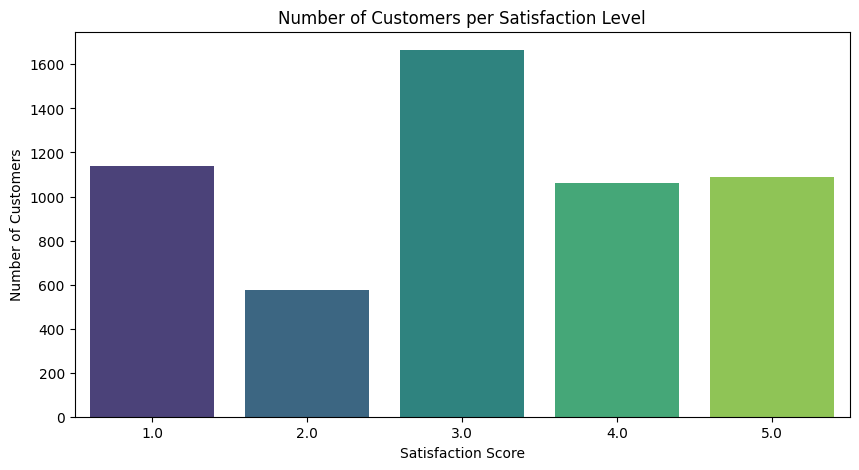

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['SatisfactionScore'], palette='viridis')

plt.title("Number of Customers per Satisfaction Level")
plt.xlabel("Satisfaction Score")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)  # Keep labels readable
plt.show()

In [44]:
fill_val = df['SatisfactionScore'].median()

In [45]:
df['SatisfactionScore'].fillna(fill_val , inplace = True)

In [46]:
df.groupby('Gender')['SatisfactionScore'].mean()

Gender
Female    3.124221
Male      3.030437
Name: SatisfactionScore, dtype: float64

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\1221462754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="OrderCount", data=df, estimator=sum, palette="coolwarm")


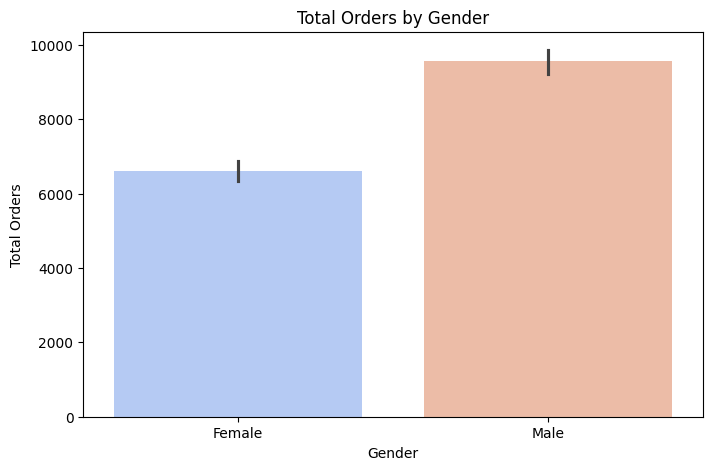

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Gender", y="OrderCount", data=df, estimator=sum, palette="coolwarm")

plt.title("Total Orders by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Orders")
plt.show()

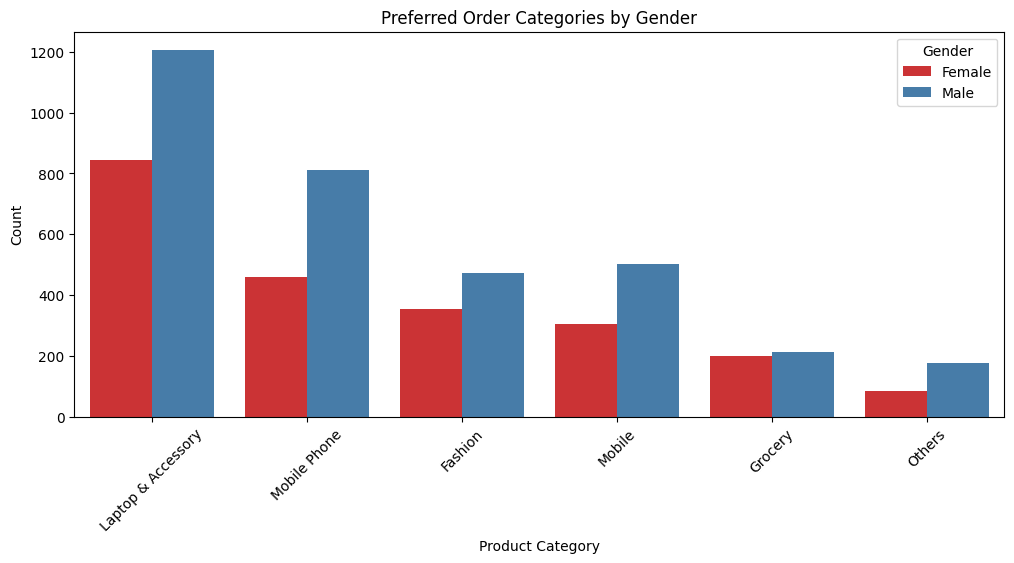

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x="PreferedOrderCat", hue="Gender", data=df, palette="Set1", order=df["PreferedOrderCat"].value_counts().index)

plt.title("Preferred Order Categories by Gender")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

In [49]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2229
Credit Card         1449
E wallet             597
UPI                  392
COD                  356
CC                   263
Cash on Delivery     144
Name: count, dtype: int64

In [50]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC','Credit Card')

In [51]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD','Cash on Delivery')

In [52]:
df['PreferredPaymentMode'].fillna('Unknown',inplace = True)

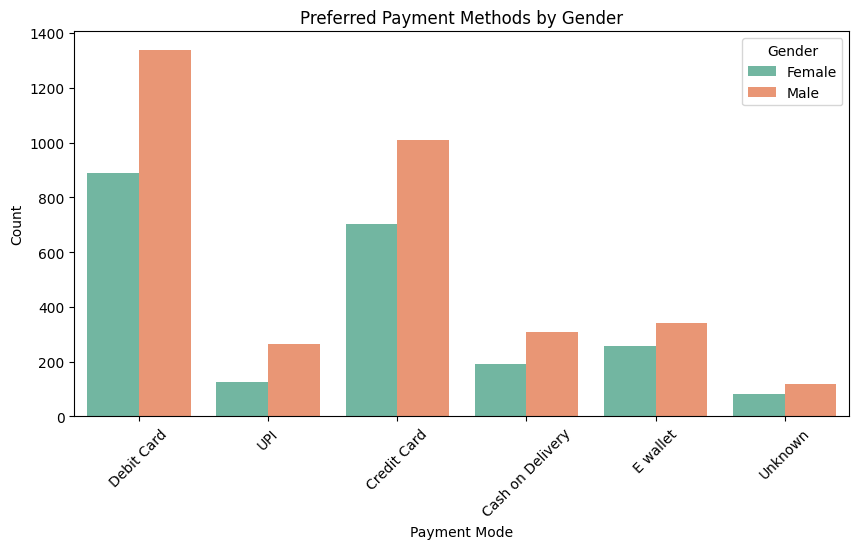

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x="PreferredPaymentMode", hue="Gender", data=df, palette="Set2")

plt.title("Preferred Payment Methods by Gender")
plt.xlabel("Payment Mode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\340809767.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\340809767.py:12: UserWarning: set_ticklabels() should only be use

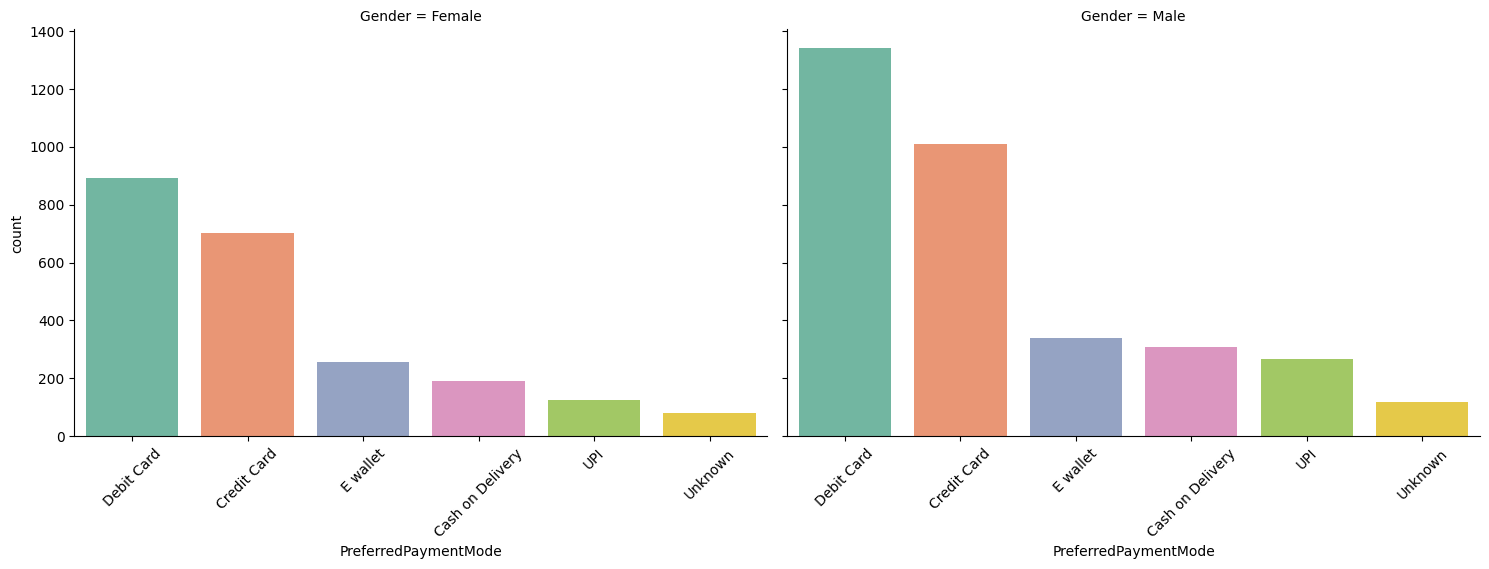

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
g = sns.FacetGrid(df, col="Gender", height=5, aspect=1.5)  

# Create count plots for each gender
g.map(sns.countplot, "PreferredPaymentMode", order=df["PreferredPaymentMode"].value_counts().index, palette="Set2")

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\4145295343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="DaySinceLastOrder", data=df, palette="husl")


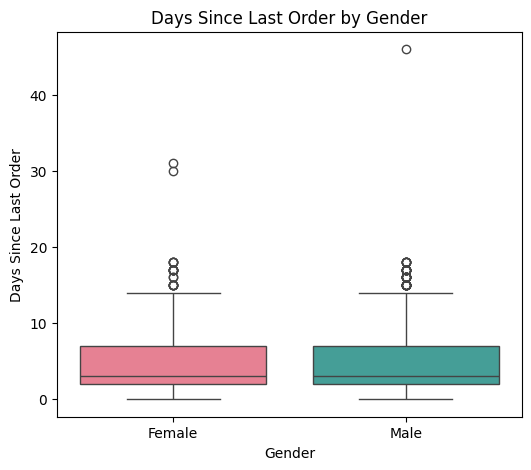

In [55]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Gender", y="DaySinceLastOrder", data=df, palette="husl")

plt.title("Days Since Last Order by Gender")
plt.xlabel("Gender")
plt.ylabel("Days Since Last Order")
plt.show()

In [56]:
df['DaySinceLastOrder'].isnull().sum()

307

In [57]:
df[df['DaySinceLastOrder'].isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
88,50089,0,24.0,Mobile Phone,1,14.0,Debit Card,Male,2.0,4.0,Fashion,4.0,Divorced,6,0,16.0,1.0,4.0,NaN,224.90
97,50098,0,10.0,Computer,1,17.0,UPI,Male,2.0,3.0,Fashion,2.0,Married,2,1,14.0,0.0,1.0,NaN,221.85
126,50127,0,12.0,Computer,1,8.0,Cash on Delivery,Female,3.0,3.0,Fashion,3.0,Single,1,0,25.0,10.0,11.0,NaN,209.38
146,50147,1,10.0,Computer,1,35.0,Debit Card,Male,2.0,3.0,Fashion,4.0,Divorced,2,1,12.0,5.0,9.0,NaN,218.49
151,50152,0,2.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,2.0,Fashion,4.0,Married,8,0,18.0,5.0,6.0,NaN,219.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,55592,0,6.0,Mobile Phone,3,8.0,E wallet,Female,3.0,4.0,Fashion,1.0,Married,3,0,20.0,1.0,6.0,NaN,229.22
5608,55609,0,15.0,Mobile Phone,3,10.0,Debit Card,Male,3.0,5.0,Laptop & Accessory,4.0,Married,4,0,12.0,2.0,2.0,NaN,214.38
5610,55611,0,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4.0,Fashion,1.0,Single,3,1,17.0,2.0,2.0,NaN,213.37
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4.0,Laptop & Accessory,5.0,Single,2,0,20.0,2.0,2.0,NaN,224.36


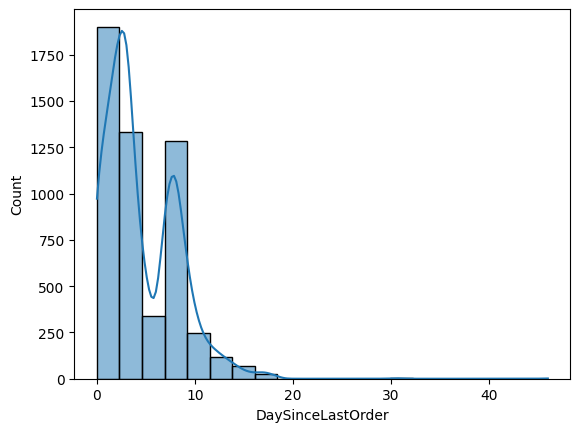

In [58]:
sns.histplot(df['DaySinceLastOrder'].dropna(), bins=20, kde=True)

plt.show()

In [59]:
df['DaySinceLastOrder'].mean()

4.543490512868683

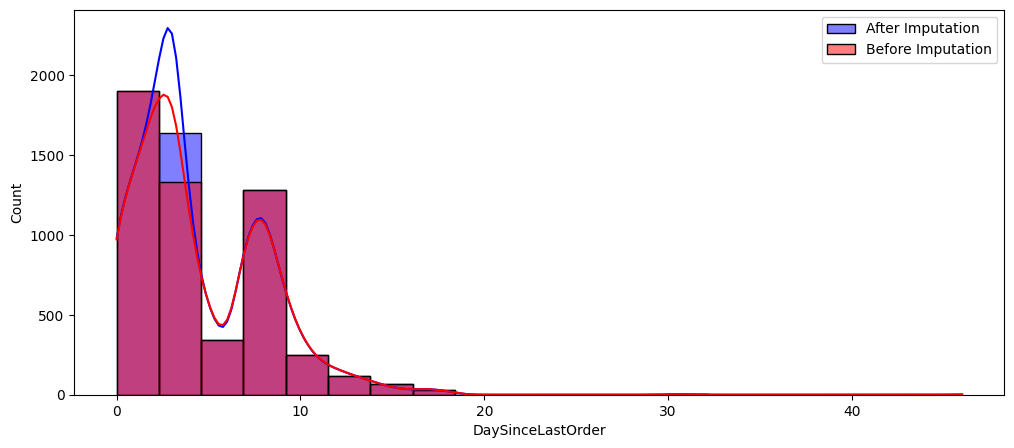

In [60]:
plt.figure(figsize=(12,5))
sns.histplot(df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median()), bins=20, kde=True, color="blue", label="After Imputation")
sns.histplot(df['DaySinceLastOrder'].dropna(), bins=20, kde=True, color="red", alpha=0.5, label="Before Imputation")
plt.legend()
plt.show()

In [61]:
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(),inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5269 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5185 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5430 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5430 non-null   object 
 13  NumberOfAddress        

In [63]:
df[df['HourSpendOnApp'].isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3.0,Mobile,5.0,Single,3,0,11.0,1.0,1.0,3.0,129.60
8,50009,1,NaN,Phone,3,9.0,E wallet,Male,NaN,4.0,Mobile,3.0,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
16,50017,1,0.0,Computer,1,12.0,Debit Card,Female,NaN,4.0,Mobile,2.0,Single,2,1,18.0,1.0,1.0,0.0,129.26
37,50038,0,1.0,Phone,1,27.0,Credit Card,Male,NaN,3.0,Mobile,2.0,Divorced,2,0,11.0,0.0,1.0,2.0,127.13
44,50045,0,5.0,Phone,1,NaN,Debit Card,Male,NaN,3.0,Mobile,3.0,Single,4,0,20.0,0.0,1.0,4.0,130.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,52766,0,14.0,Phone,1,7.0,Debit Card,Male,NaN,3.0,Mobile,1.0,Married,4,0,22.0,0.0,1.0,0.0,127.82
2771,52772,0,5.0,Phone,1,NaN,Debit Card,Female,NaN,4.0,Mobile,4.0,Single,2,0,13.0,0.0,4.0,1.0,128.37
2800,52801,0,13.0,Phone,1,8.0,Debit Card,Male,NaN,4.0,Mobile,3.0,Single,3,0,14.0,0.0,2.0,2.0,128.09
2803,52804,0,8.0,Phone,1,7.0,Debit Card,Female,NaN,5.0,Mobile,3.0,Married,2,0,12.0,1.0,1.0,1.0,129.77


In [64]:
df['HourSpendOnApp'].value_counts()

HourSpendOnApp
3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: count, dtype: int64

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\3020416774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gender'], y=df['HourSpendOnApp'], estimator=np.mean, palette="coolwarm")


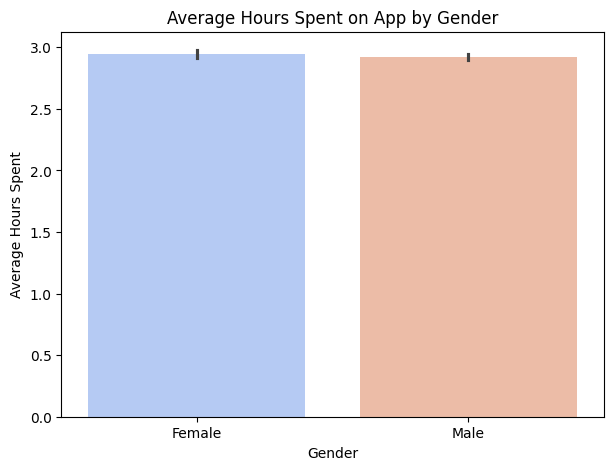

In [65]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Gender'], y=df['HourSpendOnApp'], estimator=np.mean, palette="coolwarm")
plt.title("Average Hours Spent on App by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Hours Spent")
plt.show()

In [66]:
df.groupby('Gender')['HourSpendOnApp'].mean()

Gender
Female    2.948076
Male      2.920447
Name: HourSpendOnApp, dtype: float64

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\1177731337.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == 'Male']['HourSpendOnApp'], label="Male", shade=True, color="blue")
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\1177731337.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == 'Female']['HourSpendOnApp'], label="Female", shade=True, color="red")


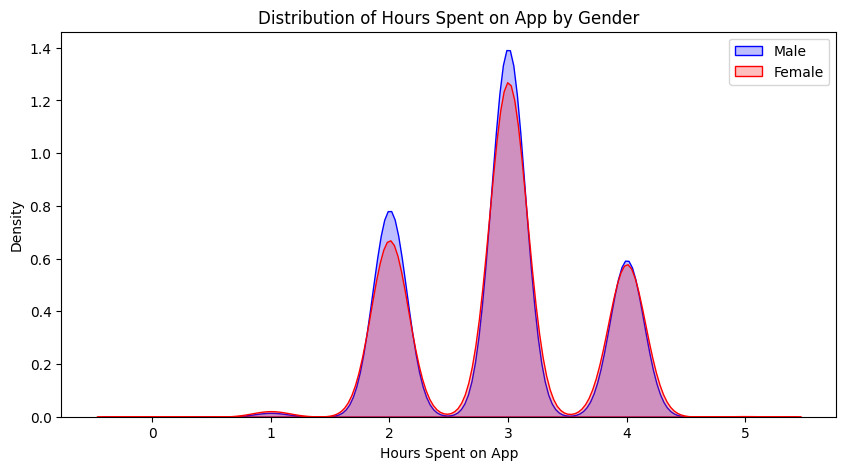

In [67]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df['Gender'] == 'Male']['HourSpendOnApp'], label="Male", shade=True, color="blue")
sns.kdeplot(df[df['Gender'] == 'Female']['HourSpendOnApp'], label="Female", shade=True, color="red")
plt.title("Distribution of Hours Spent on App by Gender")
plt.xlabel("Hours Spent on App")
plt.legend()
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\4052385001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gender'], y=df['OrderCount'], estimator=np.mean, palette="coolwarm")


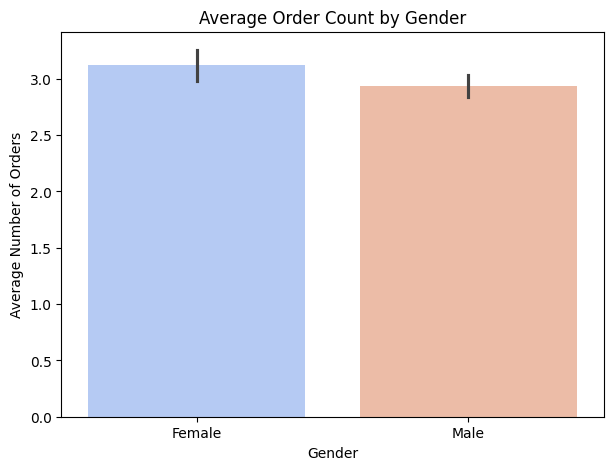

In [68]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Gender'], y=df['OrderCount'], estimator=np.mean, palette="coolwarm")
plt.title("Average Order Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Number of Orders")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\2593066741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gender'], y=df['OrderAmountHikeFromlastYear'], estimator=np.mean, palette="coolwarm")


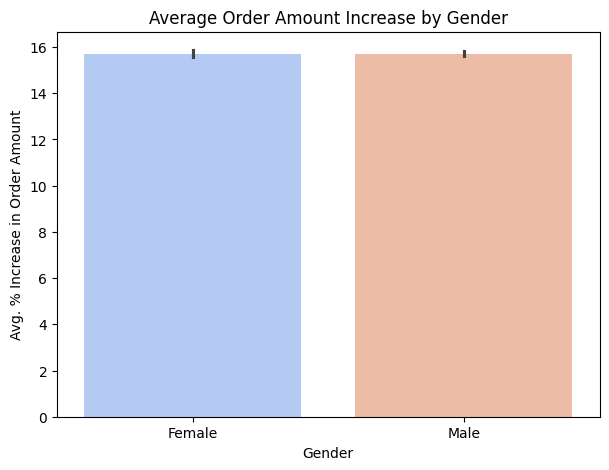

In [69]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Gender'], y=df['OrderAmountHikeFromlastYear'], estimator=np.mean, palette="coolwarm")
plt.title("Average Order Amount Increase by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. % Increase in Order Amount")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\873214469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gender'], y=df['CashbackAmount'], estimator=np.mean, palette="coolwarm")


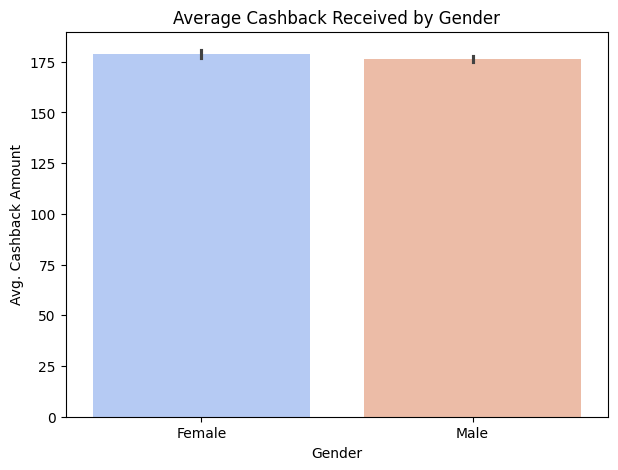

In [70]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Gender'], y=df['CashbackAmount'], estimator=np.mean, palette="coolwarm")
plt.title("Average Cashback Received by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Cashback Amount")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\317002432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="OrderAmountHikeFromlastYear", data=df, palette="coolwarm")


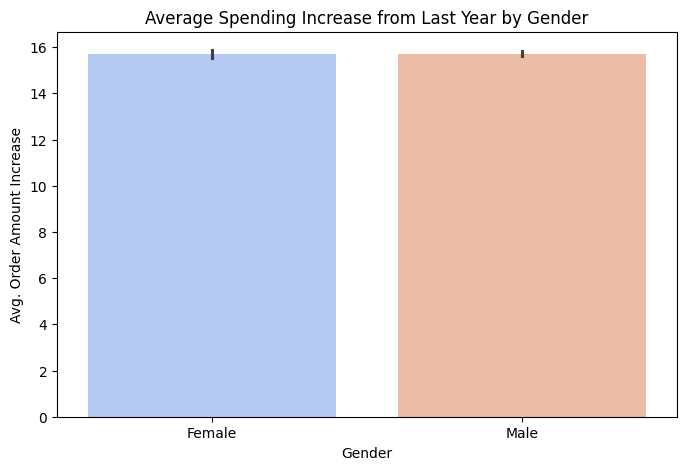

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Gender", y="OrderAmountHikeFromlastYear", data=df, palette="coolwarm")
plt.title("Average Spending Increase from Last Year by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Order Amount Increase")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\3584375184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="OrderCount", data=df, palette="muted")


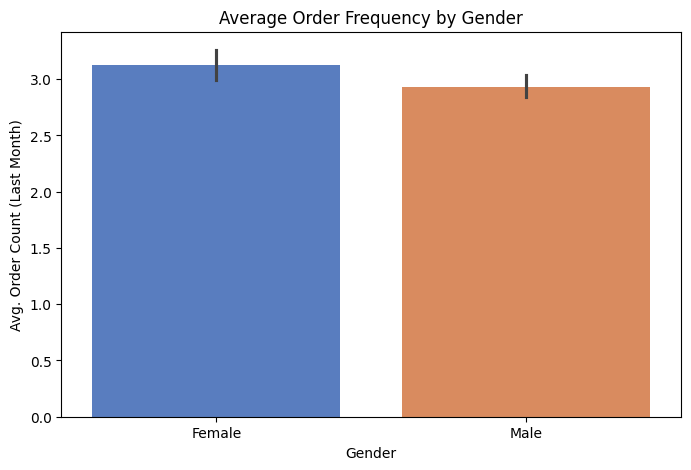

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Gender", y="OrderCount", data=df, palette="muted")
plt.title("Average Order Frequency by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Order Count (Last Month)")
plt.show()

In [73]:
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('0','Unknown')

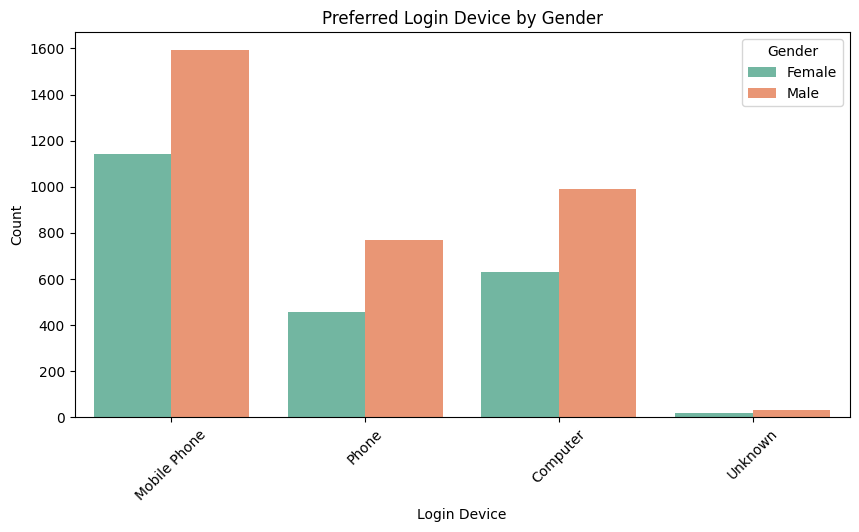

In [74]:
plt.figure(figsize=(10, 5))
sns.countplot(x="PreferredLoginDevice", hue="Gender", data=df, palette="Set2")
plt.title("Preferred Login Device by Gender")
plt.xlabel("Login Device")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\2135958667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="SatisfactionScore", data=df, palette="pastel")


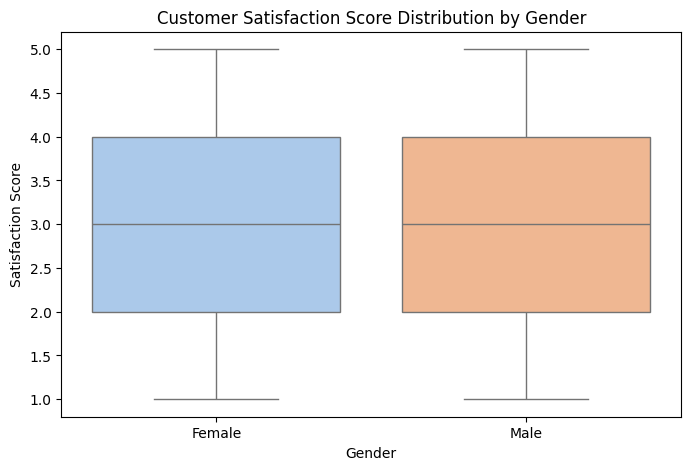

In [75]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="SatisfactionScore", data=df, palette="pastel")
plt.title("Customer Satisfaction Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Satisfaction Score")
plt.show()

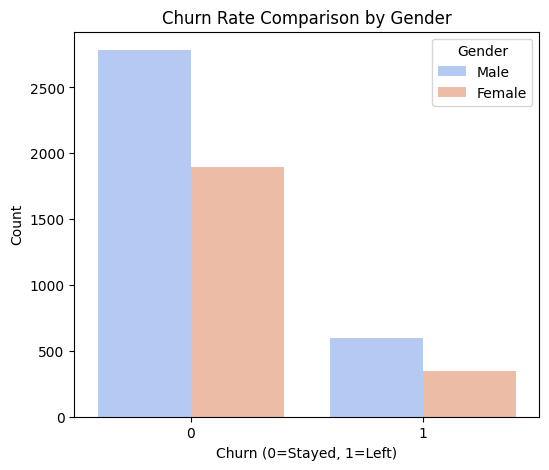

In [76]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Churn", hue="Gender", data=df, palette="coolwarm")
plt.title("Churn Rate Comparison by Gender")
plt.xlabel("Churn (0=Stayed, 1=Left)")
plt.ylabel("Count")
plt.show()

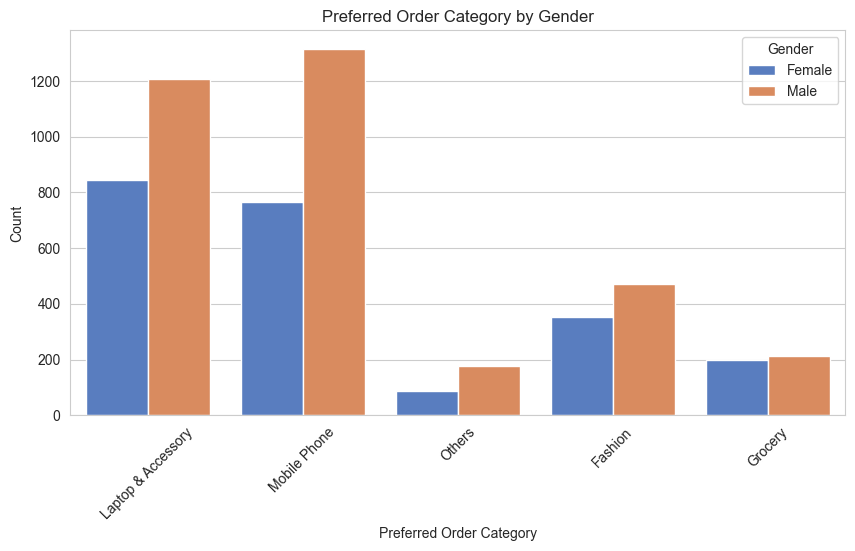

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(x="PreferedOrderCat", hue="Gender", data=df, palette="muted")
plt.title("Preferred Order Category by Gender")
plt.xlabel("Preferred Order Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\340809767.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\340809767.py:12: UserWarning: set_ticklabels() should only be use

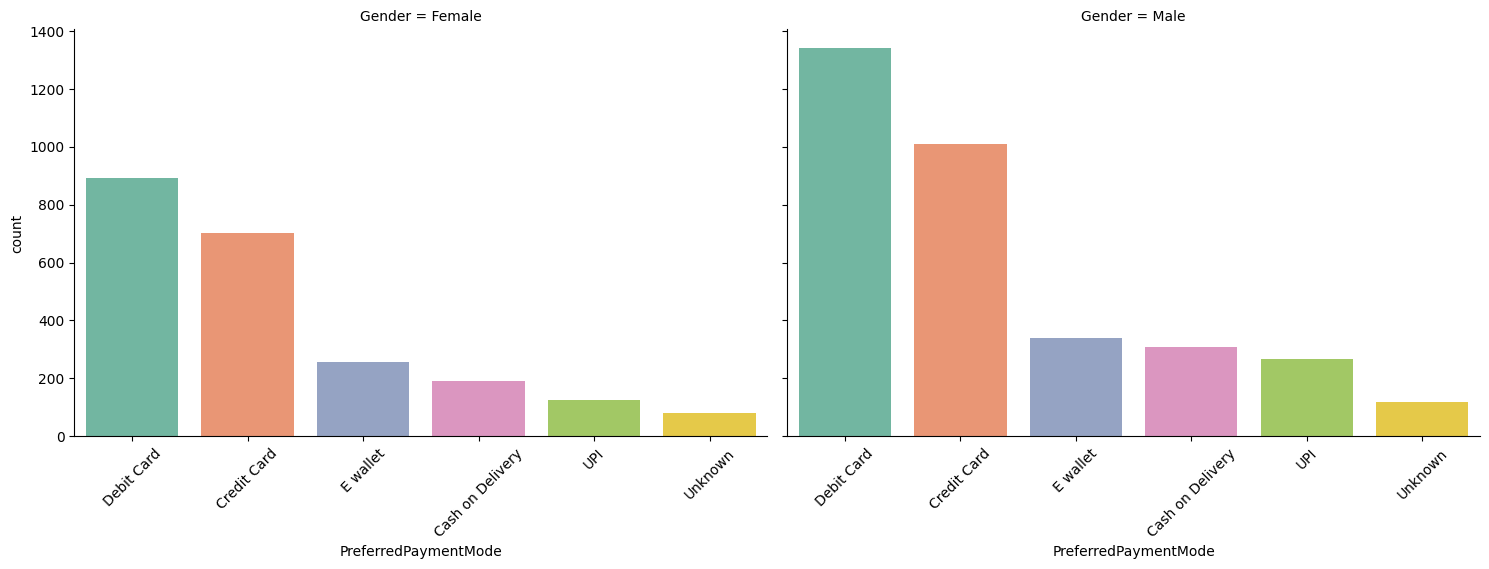

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
g = sns.FacetGrid(df, col="Gender", height=5, aspect=1.5)  

# Create count plots for each gender
g.map(sns.countplot, "PreferredPaymentMode", order=df["PreferredPaymentMode"].value_counts().index, palette="Set2")

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

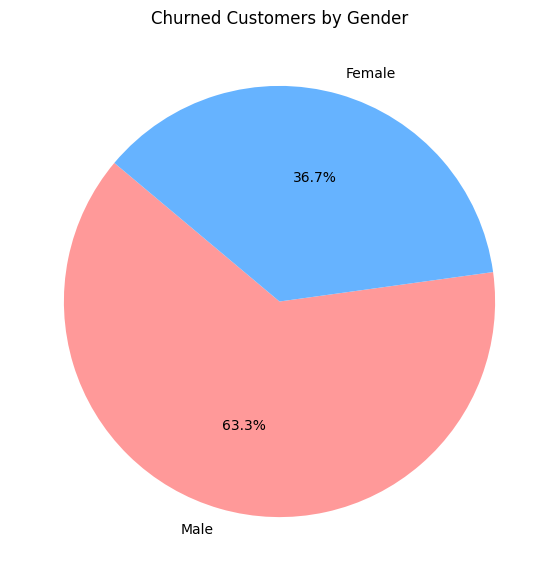

In [79]:
churned_data = df[df["Churn"] == 1]

# Count the number of churned customers by gender
churn_counts = churned_data["Gender"].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
colors = ["#ff9999", "#66b3ff"]  # Custom colors for better visualization
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Churned Customers by Gender")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\2991720778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaints_avg.index, y=complaints_avg.values, palette="coolwarm")


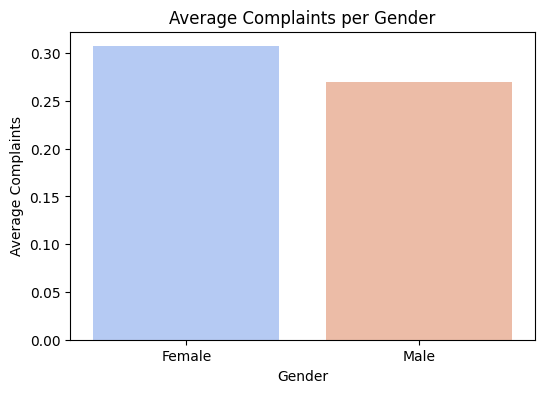

In [80]:
complaints_avg = df.groupby("Gender")["Complain"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=complaints_avg.index, y=complaints_avg.values, palette="coolwarm")
plt.title("Average Complaints per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Complaints")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\4265249361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours_avg.index, y=hours_avg.values, palette="viridis")


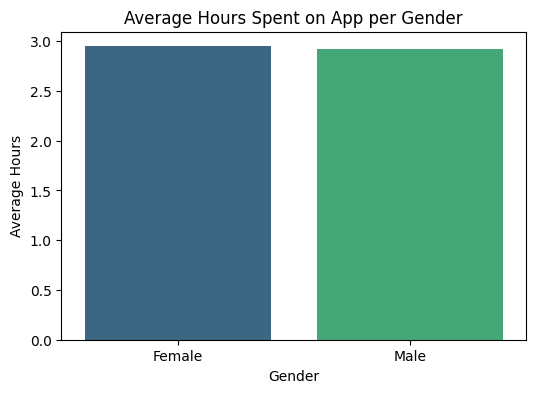

In [81]:
hours_avg = df.groupby("Gender")["HourSpendOnApp"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=hours_avg.index, y=hours_avg.values, palette="viridis")
plt.title("Average Hours Spent on App per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Hours")
plt.show()

In [82]:
hours_avg = df.groupby("Gender")["HourSpendOnApp"].mean()
hours_avg

Gender
Female    2.948076
Male      2.920447
Name: HourSpendOnApp, dtype: float64

Text(0, 0.5, 'Order Count')

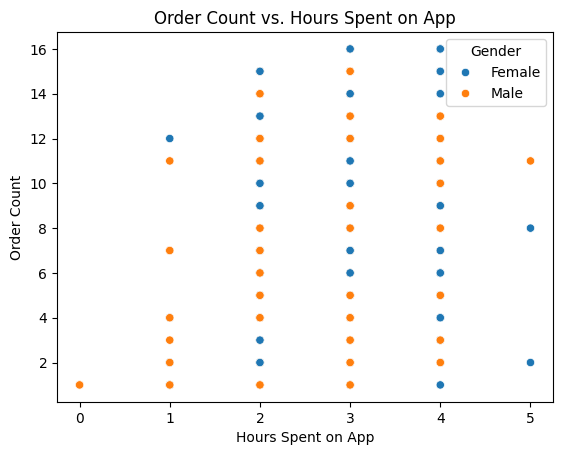

In [83]:
sns.scatterplot(x=df['HourSpendOnApp'], y=df['OrderCount'], hue=df['Gender'])
plt.title('Order Count vs. Hours Spent on App')
plt.xlabel('Hours Spent on App')
plt.ylabel('Order Count')

<Figure size 1000x500 with 0 Axes>

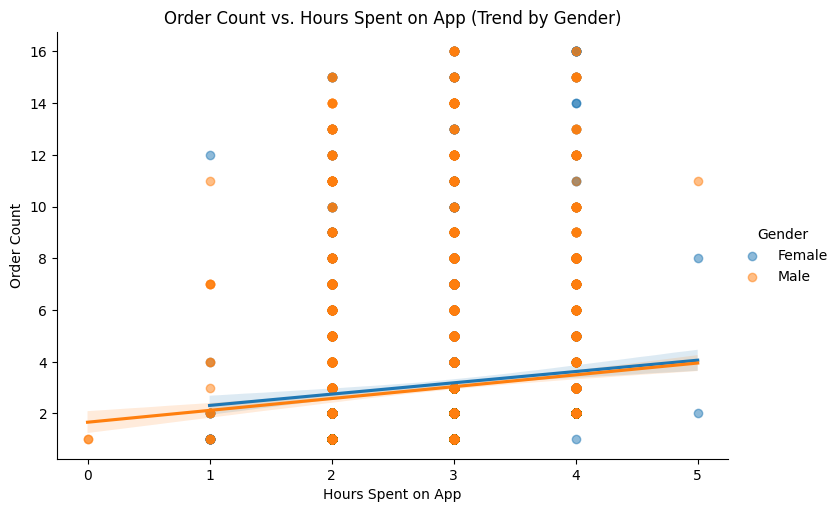

In [84]:
plt.figure(figsize=(10, 5))
sns.lmplot(x="HourSpendOnApp", y="OrderCount", hue="Gender", data=df, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Order Count vs. Hours Spent on App (Trend by Gender)")
plt.xlabel("Hours Spent on App")
plt.ylabel("Order Count")
plt.show()

In [85]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,3.0,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3.0,Mobile,5.0,Single,3,0,11.0,1.0,1.0,3.0,129.60


C:\Users\modern\AppData\Local\Temp\ipykernel_15112\1918329084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='CouponUsed', data=coupon_usage, palette='coolwarm')


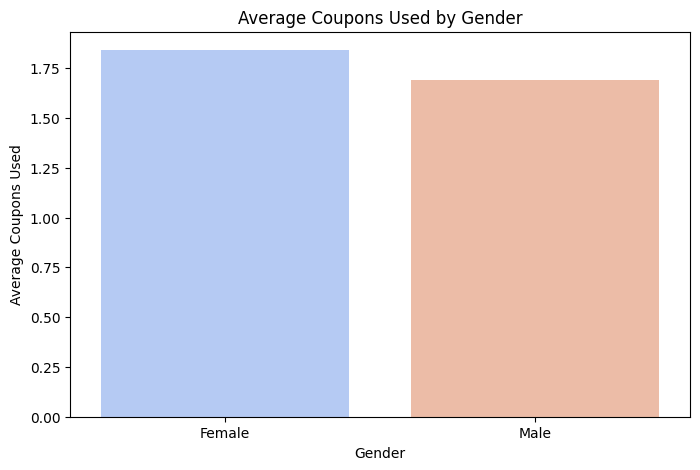

In [86]:
coupon_usage = df.groupby('Gender')['CouponUsed'].mean().reset_index()

# Plotting the coupon usage by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='CouponUsed', data=coupon_usage, palette='coolwarm')
plt.title('Average Coupons Used by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Coupons Used')
plt.show()

<Figure size 1000x600 with 0 Axes>

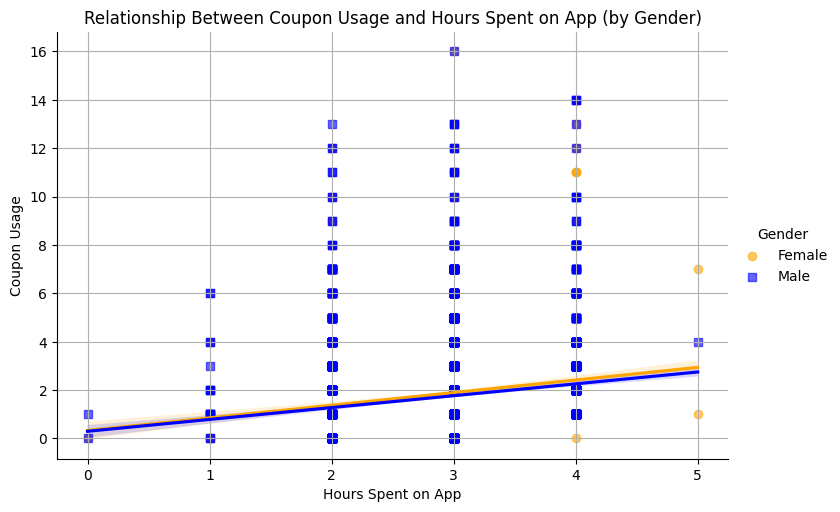

In [87]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='HourSpendOnApp', y='CouponUsed', hue='Gender', 
           markers=['o', 's'], palette={'Male': 'blue', 'Female': 'orange'}, 
           aspect=1.5, scatter_kws={'alpha':0.6})

# Labels and title
plt.xlabel("Hours Spent on App")
plt.ylabel("Coupon Usage")
plt.title("Relationship Between Coupon Usage and Hours Spent on App (by Gender)")
plt.grid(True)
plt.show()

In [88]:
df['HourSpendOnApp'].describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

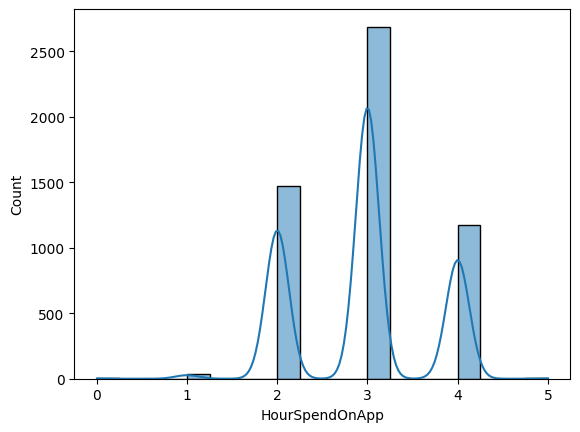

In [89]:
sns.histplot(df['HourSpendOnApp'].dropna(), bins=20, kde=True)

plt.show()

In [90]:
df['HourSpendOnApp'].isnull().sum()

255

In [91]:
df['HourSpendOnApp'].median()

3.0

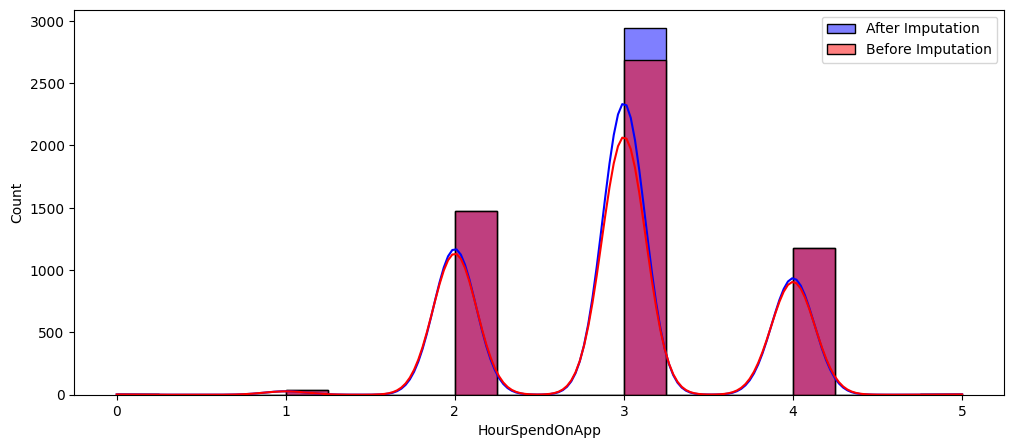

In [92]:
plt.figure(figsize=(12,5))
sns.histplot(df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median()), bins=20, kde=True, color="blue", label="After Imputation")
sns.histplot(df['HourSpendOnApp'].dropna(), bins=20, kde=True, color="red", alpha=0.5, label="Before Imputation")
plt.legend()
plt.show()

In [93]:
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(),inplace = True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5269 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5185 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5430 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5430 non-null   object 
 13  NumberOfAddress        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


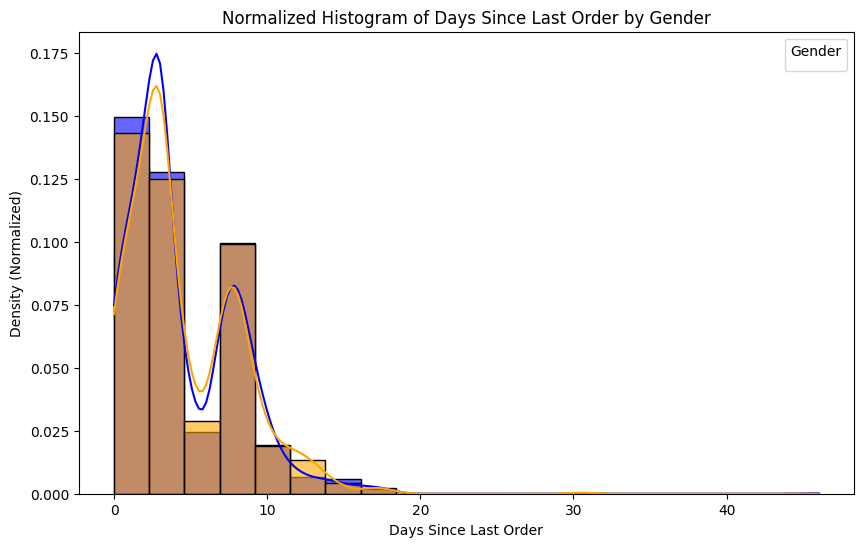

In [95]:
plt.figure(figsize=(10, 6))

# Plot histogram with density=True to normalize counts
sns.histplot(df, x="DaySinceLastOrder", hue="Gender", kde=True, stat="density", bins=20, common_norm=False, alpha=0.6,palette={'Male': 'blue', 'Female': 'orange'})

plt.xlabel("Days Since Last Order")
plt.ylabel("Density (Normalized)")
plt.title("Normalized Histogram of Days Since Last Order by Gender")
plt.legend(title="Gender")
plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\3819182711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Gender', y='DaySinceLastOrder', palette={'Male': 'blue', 'Female': 'orange'})
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 72.4% of the poin

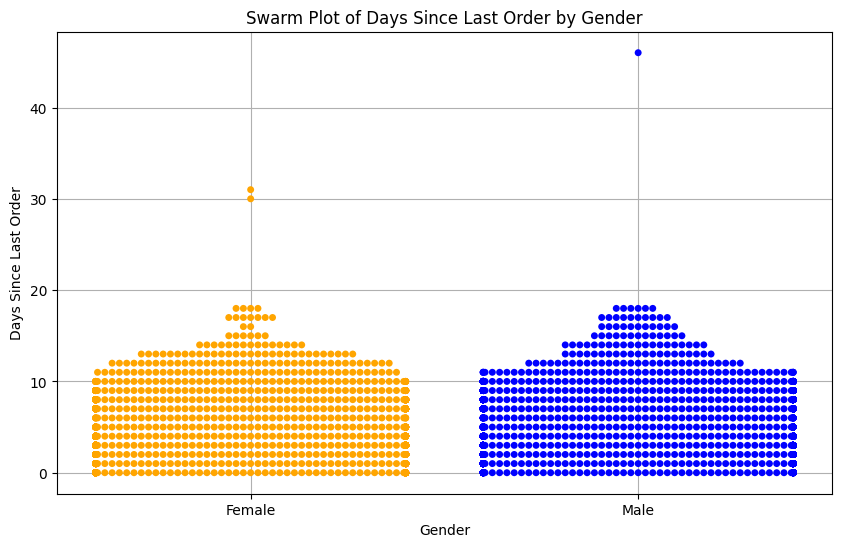

In [96]:
plt.figure(figsize=(10, 6))

sns.swarmplot(data=df, x='Gender', y='DaySinceLastOrder', palette={'Male': 'blue', 'Female': 'orange'})

plt.title("Swarm Plot of Days Since Last Order by Gender")
plt.xlabel("Gender")
plt.ylabel("Days Since Last Order")
plt.grid(True)

plt.show()

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\4204679384.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(['Days_Bucket', 'Gender'])['Churn'].mean().reset_index()


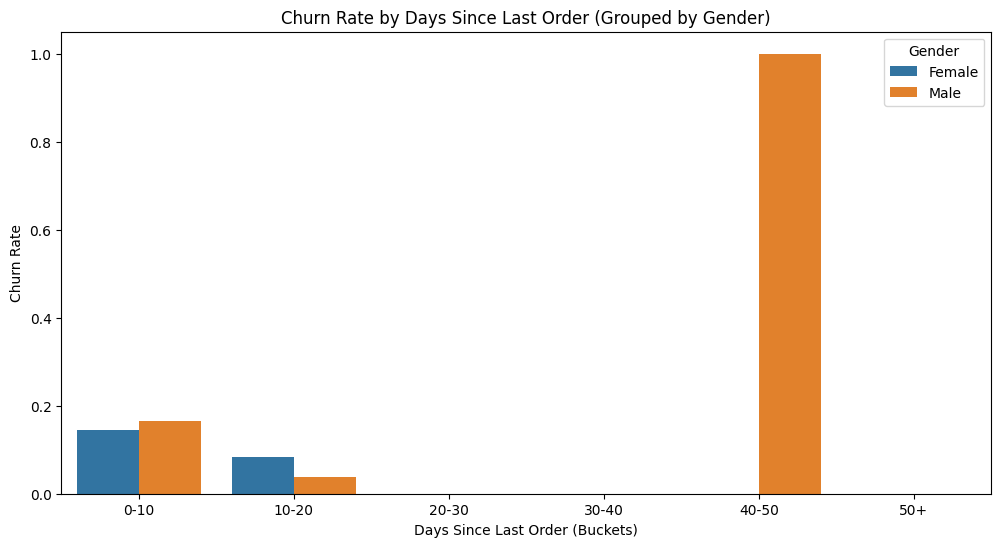

In [97]:
df['Days_Bucket'] = pd.cut(df['DaySinceLastOrder'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])

churn_rate = df.groupby(['Days_Bucket', 'Gender'])['Churn'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_rate, x='Days_Bucket', y='Churn', hue='Gender')
plt.title('Churn Rate by Days Since Last Order (Grouped by Gender)')
plt.xlabel('Days Since Last Order (Buckets)')
plt.ylabel('Churn Rate')
plt.show()

In [98]:
df['DaySinceLastOrder'].describe()

count    5630.000000
mean        4.459325
std         3.570626
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

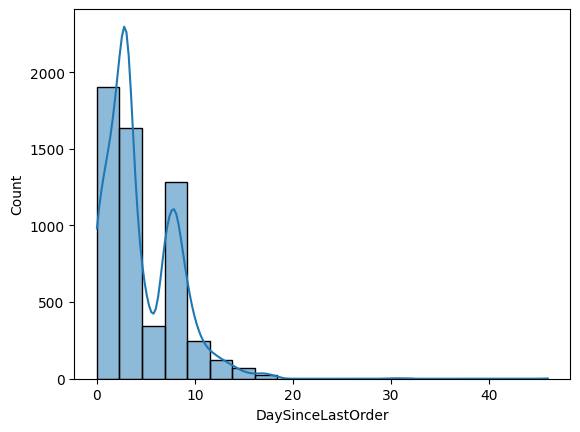

In [99]:
sns.histplot(df['DaySinceLastOrder'].dropna(), bins=20, kde=True)

plt.show()

In [100]:
df['DaySinceLastOrder'].value_counts()

DaySinceLastOrder
3.0     1207
2.0      792
1.0      614
8.0      538
0.0      496
7.0      447
4.0      431
9.0      299
5.0      228
10.0     157
6.0      113
11.0      91
12.0      69
13.0      51
14.0      35
15.0      19
17.0      17
16.0      13
18.0      10
30.0       1
46.0       1
31.0       1
Name: count, dtype: int64

In [101]:
df[df['DaySinceLastOrder'] > 18]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Days_Bucket
1490,51491,0,3.0,Phone,1,11.0,Cash on Delivery,Female,2.0,3.0,...,5.0,Married,6,0,14.0,0.0,2.0,30.0,132.04,20-30
2040,52041,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4.0,...,3.0,Married,6,0,11.0,5.0,11.0,46.0,206.09,40-50
4305,54306,0,4.0,Mobile Phone,1,12.0,Cash on Delivery,Female,3.0,4.0,...,5.0,Married,7,0,15.0,1.0,3.0,31.0,157.04,30-40


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5630 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   Tenure                       5269 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   object  
 4   CityTier                     5630 non-null   int64   
 5   WarehouseToHome              5185 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   object  
 7   Gender                       5630 non-null   object  
 8   HourSpendOnApp               5630 non-null   float64 
 9   NumberOfDeviceRegistered     5430 non-null   float64 
 10  PreferedOrderCat             5630 non-null   object  
 11  SatisfactionScore            5630 non-null   float64 
 12  MaritalStatus                5430 non-null   object  
 13  NumberOf

In [103]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone','Mobile Phone')

In [104]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer', 'Unknown'], dtype=object)

C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\3837524737.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\3837524737.py:9: UserWarning: set_ticklabels() should only be use

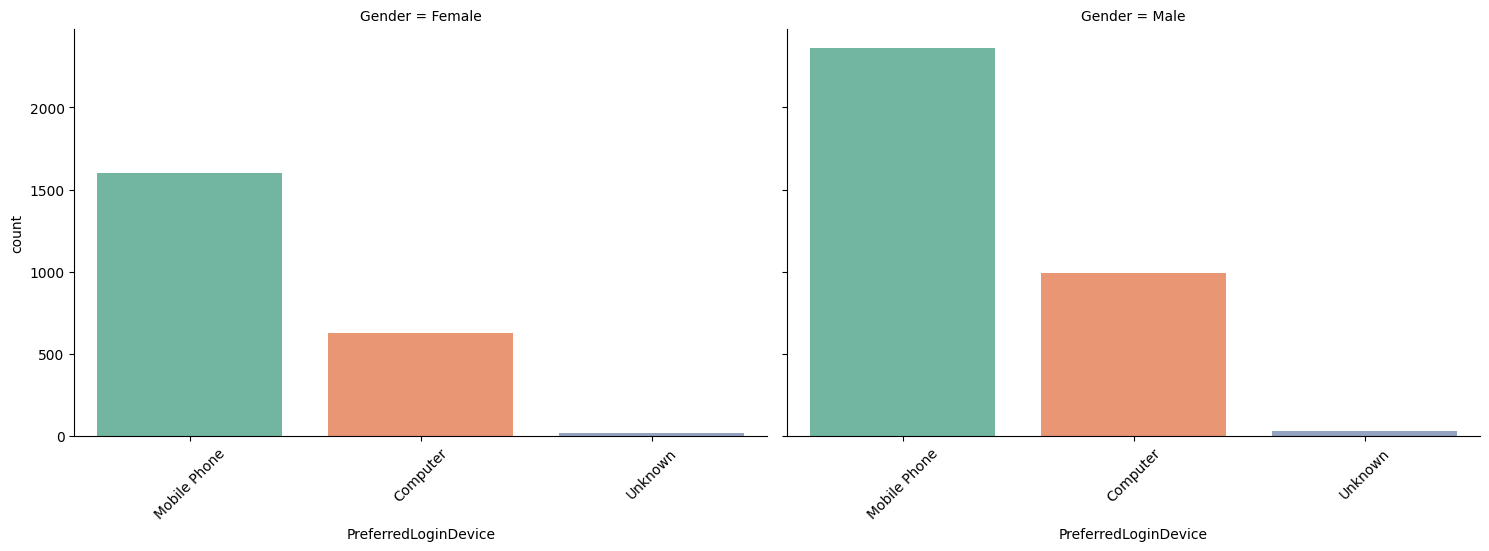

In [105]:
# Set figure size
g = sns.FacetGrid(df, col="Gender", height=5, aspect=1.5)  

# Create count plots for each gender
g.map(sns.countplot, "PreferredLoginDevice", order=df["PreferredLoginDevice"].value_counts().index, palette="Set2")

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [106]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [112]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile','Mobile Phone')

In [113]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\2888912173.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\modern\AppData\Local\Temp\ipykernel_15112\2888912173.py:9: UserWarning: set_ticklabels() should only be use

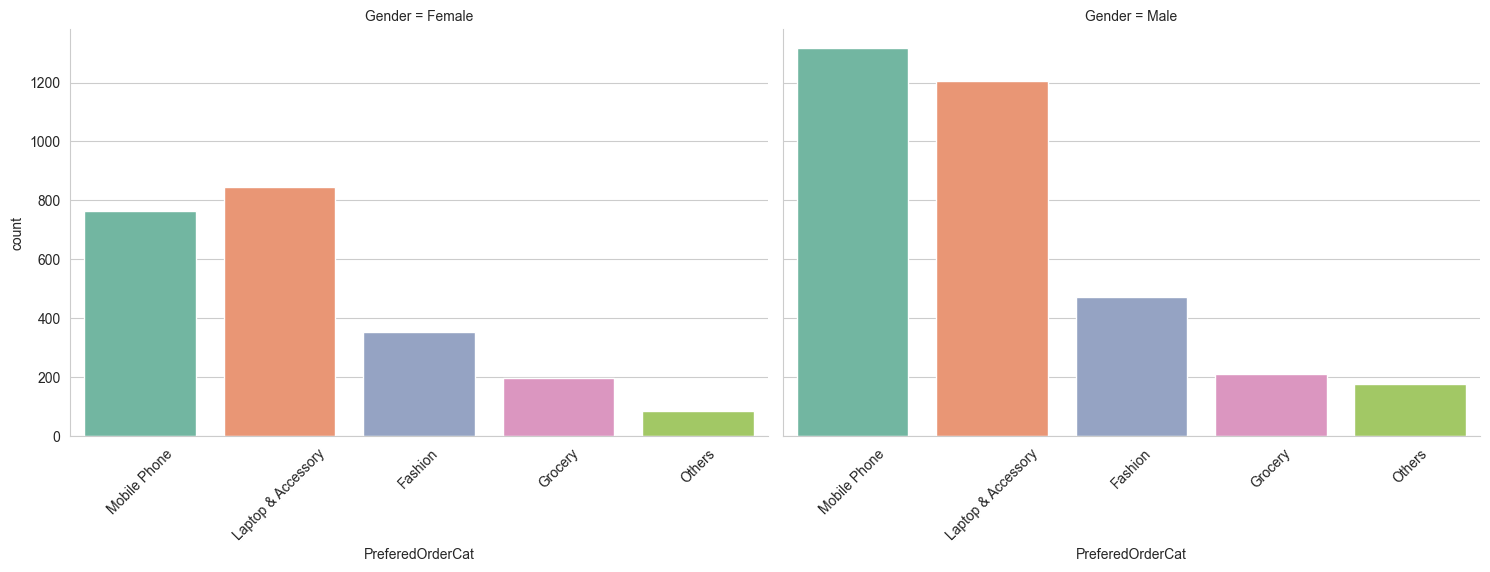

In [114]:
# Set figure size
g = sns.FacetGrid(df, col="Gender", height=5, aspect=1.5)  

# Create count plots for each gender
g.map(sns.countplot, "PreferedOrderCat", order=df["PreferedOrderCat"].value_counts().index, palette="Set2")

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [110]:
df['PreferedOrderCat'].isnull().sum()

0

C:\Users\modern\AppData\Local\Temp\ipykernel_15112\3602459627.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values,


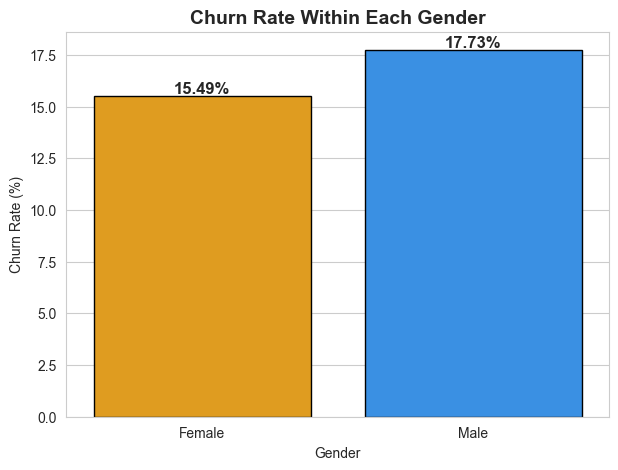

In [111]:
churn_counts = df.groupby("Gender")["Churn"].sum()  # Sum gives total churned customers per gender
total_counts = df["Gender"].value_counts()  # Total customers per gender

# Compute churn rate for each gender
churn_rate_by_gender = (churn_counts / total_counts) * 100  # Convert to percentage

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values, 
                 palette=["#FFA500", "#1E90FF"], edgecolor="black")

# Add labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Churn Rate Within Each Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender"), plt.ylabel("Churn Rate (%)")
plt.show()

In [ ]:
df['']